In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
file_path = 'Crash 1.csv' 
data = pd.read_csv(file_path)

data.head()


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2161/3808320401.py:2: DtypeWarning: Columns (11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20245021,WA,4,2024,Friday,00:31,Single,4,No,No,No,110,NaN,NaN,NaN,NaN,No,No,Weekday,Night
1,20243023,Qld,4,2024,Friday,01:00,Single,1,No,No,No,60,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,Weekday,Night
2,20245024,WA,4,2024,Friday,01:12,Single,1,No,No,Yes,110,NaN,NaN,NaN,NaN,No,No,Weekday,Night
3,20241054,NSW,4,2024,Friday,03:30,Multiple,1,No,Yes,No,60,Major Cities of Australia,Sydney - Outer West and Blue Mountains,Penrith,Collector Road,No,No,Weekday,Night
4,20242024,Vic,4,2024,Friday,12:48,Multiple,1,-9,-9,-9,80,Major Cities of Australia,Melbourne - South East,Casey,Collector Road,No,No,Weekday,Day


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50507 entries, 0 to 50506
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       50507 non-null  int64 
 1   State                          50507 non-null  object
 2   Month                          50507 non-null  int64 
 3   Year                           50507 non-null  int64 
 4   Dayweek                        50507 non-null  object
 5   Time                           50469 non-null  object
 6   Crash Type                     50507 non-null  object
 7   Number Fatalities              50507 non-null  int64 
 8   Bus 
Involvement               50505 non-null  object
 9   Heavy Rigid Truck Involvement  50505 non-null  object
 10  Articulated Truck Involvement  50505 non-null  object
 11  Speed Limit                    50507 non-null  object
 12  National Remoteness Areas      11090 non-null  object
 13  S

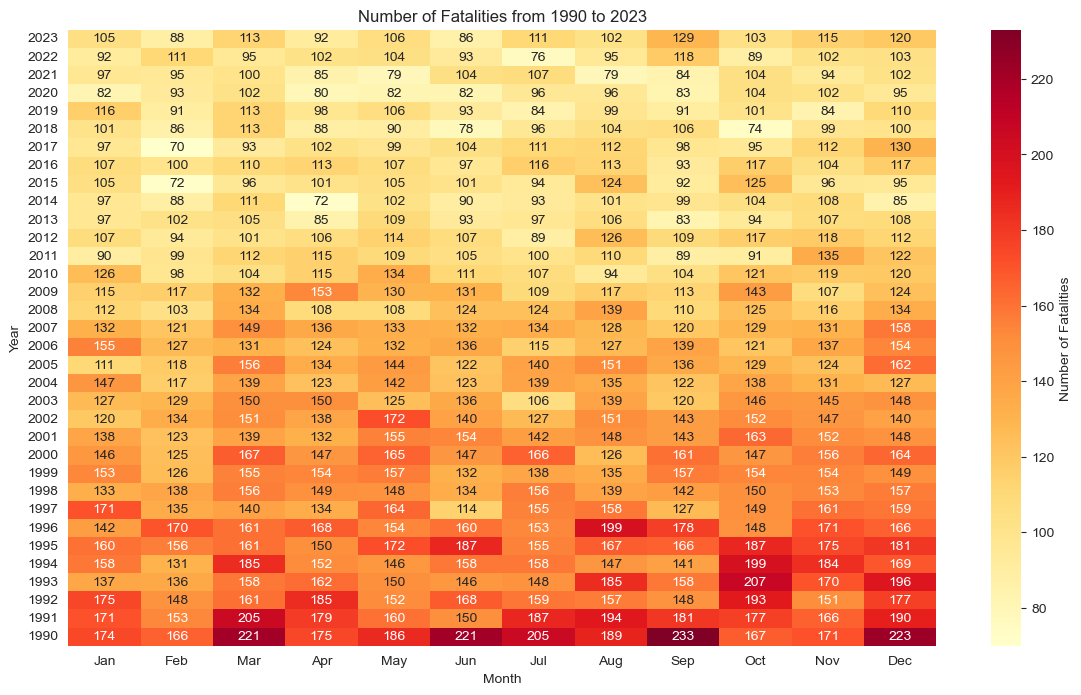

In [5]:


data = data[data['Year'] != 2024]
data = data[data['Year'] != 1989]

heatmap_data = data.groupby(['Year', 'Month'])['Number Fatalities'].sum().unstack()

heatmap_data = heatmap_data.sort_index(ascending=False)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data.columns = month_names

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Fatalities'})

plt.title('Number of Fatalities from 1990 to 2023')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


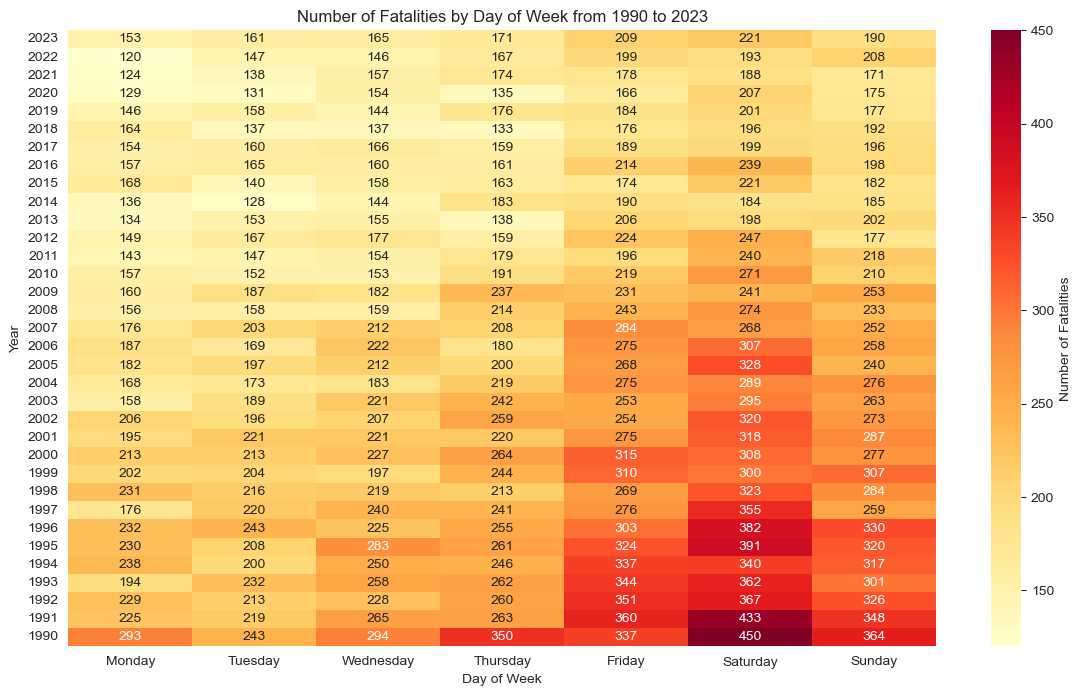

In [6]:



data = data[data['Year'] != 2024]
data = data[data['Year'] != 1989]

heatmap_data = data.groupby(['Year', 'Dayweek'])['Number Fatalities'].sum().unstack()

heatmap_data = heatmap_data.sort_index(ascending=False)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[day_order]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Fatalities'})

plt.title('Number of Fatalities by Day of Week from 1990 to 2023')
plt.xlabel('Day of Week')
plt.ylabel('Year')
plt.show()


TREND 

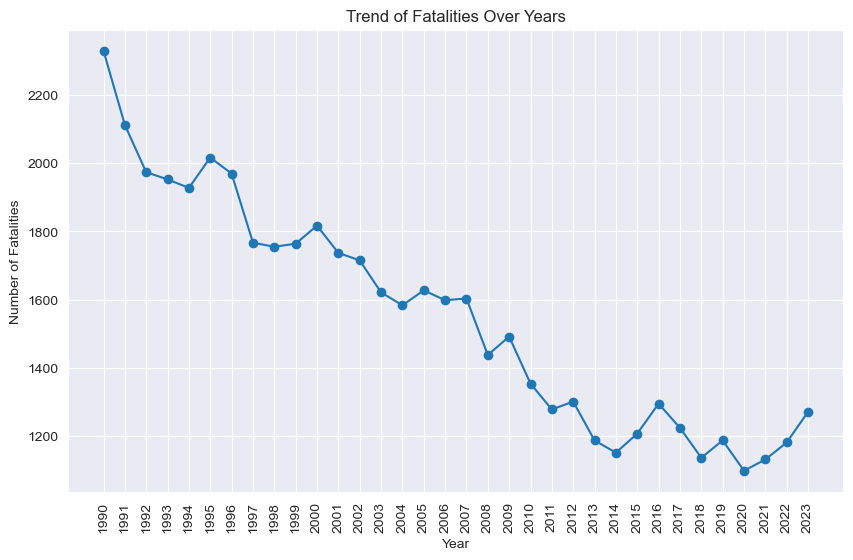

In [7]:
import matplotlib.pyplot as plt

data['Number Fatalities'] = pd.to_numeric(data['Number Fatalities'], errors='coerce').fillna(0)

annual_fatalities = data.groupby('Year')['Number Fatalities'].sum()

plt.figure(figsize=(10, 6))
plt.plot(annual_fatalities.index, annual_fatalities.values, marker='o')
plt.title('Trend of Fatalities Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.xticks(annual_fatalities.index, rotation=90)
plt.show()


<Figure size 1400x800 with 0 Axes>

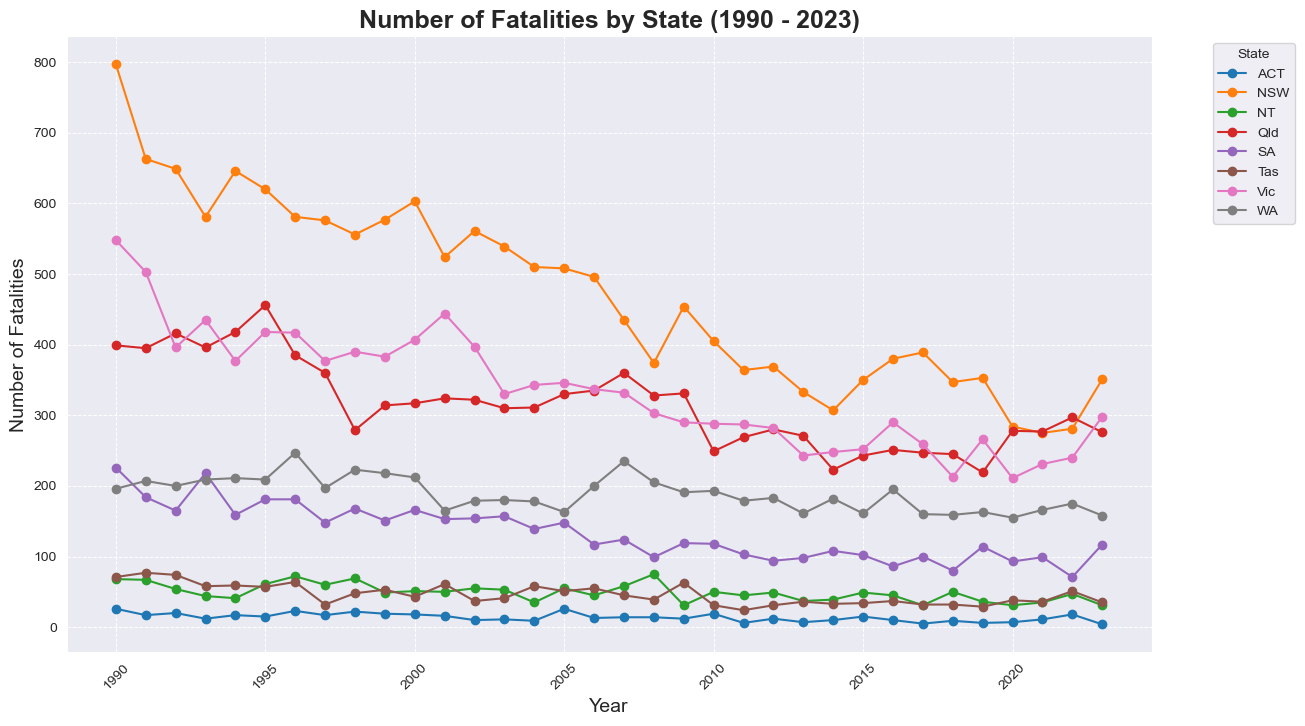

In [8]:
filtered_data = data[(data['Year'] >= 1990) & (data['Year'] <= 2023)]

state_year_fatalities = filtered_data.groupby(['Year', 'State'])['Number Fatalities'].sum().unstack()

plt.figure(figsize=(14, 8))
state_year_fatalities.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('Number of Fatalities by State (1990 - 2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)

plt.show()
